In [1]:
#프로젝트의 루트 디렉토리를 설정하기 위한 코드
import os
current_dir = os.getcwd()  # 현재 작업 디렉토리
print(os.path.dirname(current_dir))
# print(os.path.dirname(os.path.dirname(current_dir)))
# 루트 경로 설정 (예: 프로젝트 루트 경로)
project_root = os.path.dirname(current_dir)
os.chdir(project_root)  # 루트 경로로 변경

c:\sb-fsts\sb-fsts


In [2]:
import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
import numpy as np
import requests

df:                                  Time     Open     High      Low    Close  \
2022-01-03 00:00:00+09:00  2022-01-03  55800.0  56200.0  55000.0  55600.0   

                            Volume  
2022-01-03 00:00:00+09:00  51848.0  
📌 DEBUG: buy_signal - 2022-01-03 00:00:00+09:00    False
Name: MFI, dtype: bool, sell_signal - 2022-01-03 00:00:00+09:00    False
Name: MFI, dtype: bool
투자비용: 0
📌 DEBUG: buy_signal - 2022-01-03 00:00:00+09:00    False
Name: MFI, dtype: bool, sell_signal - 2022-01-03 00:00:00+09:00    False
Name: MFI, dtype: bool
총 비용: 0KRW, 총 보유량: 0주, 평균 단가: 0KRW, 실현 손익 (Realized PnL): 0KRW, 미실현 손익 (Unrealized PnL): 0KRW
df:                                  Time     Open     High      Low    Close  \
2022-01-03 00:00:00+09:00  2022-01-03  55800.0  56200.0  55000.0  55600.0   
2022-01-04 00:00:00+09:00  2022-01-04  55200.0  55800.0  54800.0  55700.0   

                            Volume  
2022-01-03 00:00:00+09:00  51848.0  
2022-01-04 00:00:00+09:00  59395.0  
📌 DEBUG: buy

(                                 Time     Open     High      Low    Close  \
 2022-01-03 00:00:00+09:00  2022-01-03  55800.0  56200.0  55000.0  55600.0   
 2022-01-04 00:00:00+09:00  2022-01-04  55200.0  55800.0  54800.0  55700.0   
 2022-01-05 00:00:00+09:00  2022-01-05  55200.0  57300.0  55100.0  55100.0   
 2022-01-06 00:00:00+09:00  2022-01-06  54700.0  55700.0  54700.0  54900.0   
 2022-01-07 00:00:00+09:00  2022-01-07  54900.0  55800.0  54600.0  54900.0   
 ...                               ...      ...      ...      ...      ...   
 2022-05-03 00:00:00+09:00  2022-05-03  50100.0  50900.0  49050.0  50000.0   
 2022-05-04 00:00:00+09:00  2022-05-04  50000.0  51800.0  50000.0  50600.0   
 2022-05-06 00:00:00+09:00  2022-05-06  50100.0  50800.0  49500.0  50200.0   
 2022-05-09 00:00:00+09:00  2022-05-09  51400.0  51600.0  49100.0  49650.0   
 2022-05-10 00:00:00+09:00  2022-05-10  49300.0  50900.0  47750.0  50600.0   
 
                              Volume   Middle         Upper   

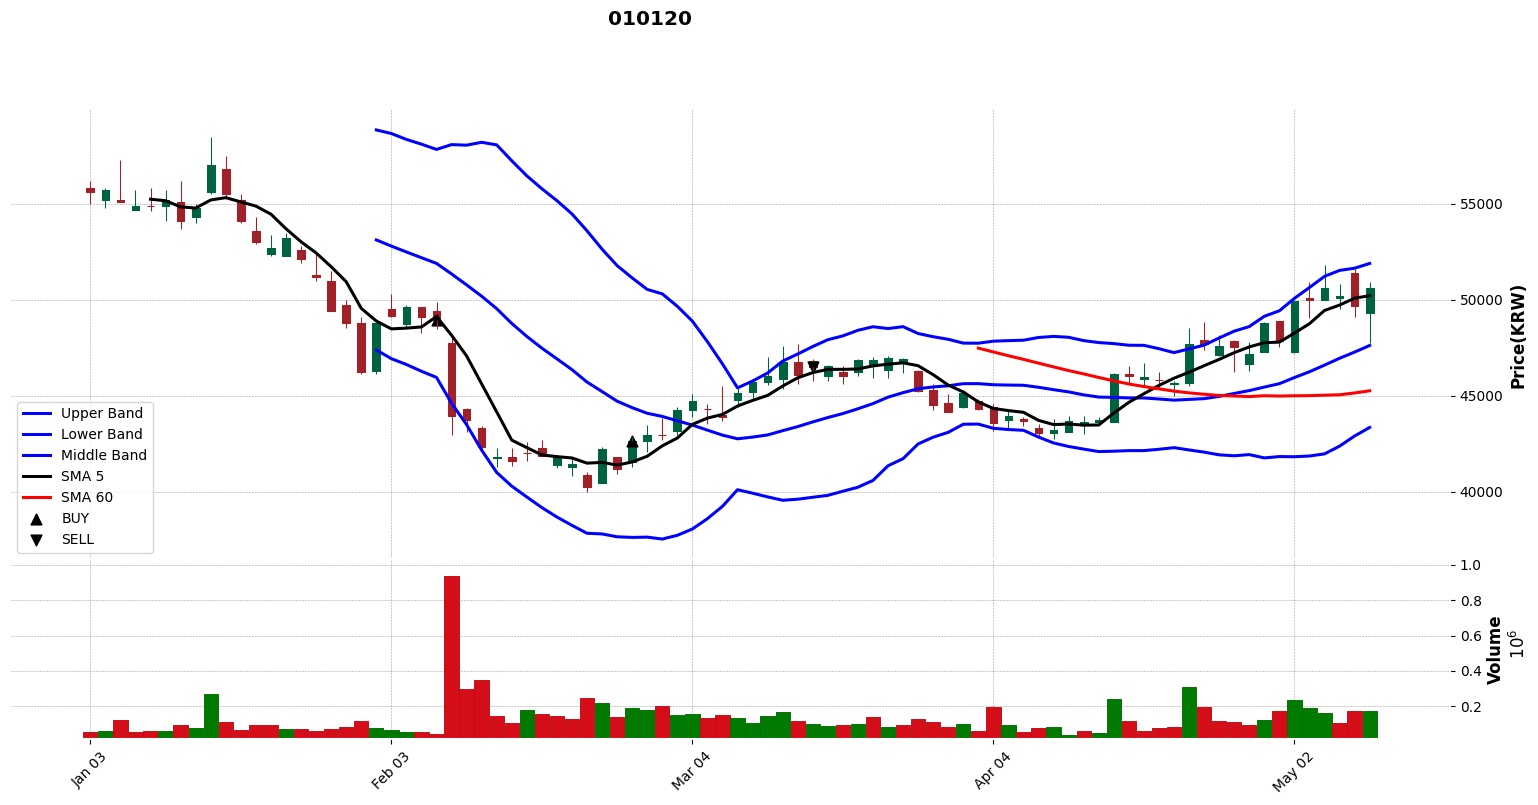

In [3]:
from app.utils.auto_trading_bot import AutoTradingBot
from datetime import date, time


user_name = "홍석문"

auto_trading_stock = AutoTradingBot()

# symbol = '329180'
symbol = '010120'

start_date = date(2022, 1, 1)
end_date = date(2022, 5, 10)

target_trade_value_krw = 1000000  # 매수 목표 거래 금액
buy_trading_logic = ['mfi_trading']
sell_trading_logic = ['mfi_trading']
interval = 'day'
rsi_buy_threshold = 35
rsi_sell_threshold = 70
# ✅ 시뮬레이션 실행 (df 내부 값을 확인할 수 있음)

auto_trading_stock.simulate_trading(
    symbol=symbol,
    start_date=start_date,
    end_date=end_date,
    target_trade_value_krw=target_trade_value_krw,
    buy_trading_logic=buy_trading_logic,
    sell_trading_logic=sell_trading_logic,
    interval=interval,
    buy_percentage=None,
    ohlc_mode='default',
    rsi_buy_threshold=rsi_buy_threshold,
    rsi_sell_threshold=rsi_sell_threshold,
    initial_capital=None
)



In [7]:
import pandas as pd
import numpy as np

from app.utils.trading_logic import TradingLogic

trading_logic = TradingLogic()

# datetime을 문자열로 변환 + NaN 값 처리
for trade in trading_logic.trade_reasons:
    trade['Time'] = trade['Time'].isoformat()  # datetime → string
    trade['Previous RSI'] = 0 if pd.isna(trade['Previous RSI']) else trade['Previous RSI']
    trade['Current RSI'] = 0 if pd.isna(trade['Current RSI']) else trade['Current RSI']

# DataFrame 변환 & CSV 저장
df = pd.DataFrame(trading_logic.trade_reasons)
df.to_csv("trade_reasons.csv", index=False, encoding="utf-8-sig")

print("✅ NaN 변환 후 CSV 저장 완료!")


✅ NaN 변환 후 CSV 저장 완료!


In [8]:
pd.read_csv("trade_reasons.csv")

EmptyDataError: No columns to parse from file

In [4]:
auto_trading_stock._get_ohlc(symbol, start_date, end_date)


[KisDomesticDailyChartBar(time='2023-01-02T00:00:00+09:00', open=29500, close=29050, high=29900, low=28900, volume=162547, amount=4759489400, change=-300),
 KisDomesticDailyChartBar(time='2023-01-03T00:00:00+09:00', open=28850, close=29500, high=29700, low=28500, volume=202188, amount=5901135000, change=450),
 KisDomesticDailyChartBar(time='2023-01-04T00:00:00+09:00', open=29000, close=30100, high=30300, low=28900, volume=211088, amount=6288252500, change=600),
 KisDomesticDailyChartBar(time='2023-01-05T00:00:00+09:00', open=30350, close=29300, high=30450, low=29250, volume=240981, amount=7129112150, change=-800),
 KisDomesticDailyChartBar(time='2023-01-06T00:00:00+09:00', open=29050, close=30100, high=30350, low=29000, volume=199197, amount=5959750600, change=800),
 KisDomesticDailyChartBar(time='2023-01-09T00:00:00+09:00', open=30550, close=31200, high=31550, low=30200, volume=266654, amount=8255589600, change=1100),
 KisDomesticDailyChartBar(time='2023-01-10T00:00:00+09:00', open=31